___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [46]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [7]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [9]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

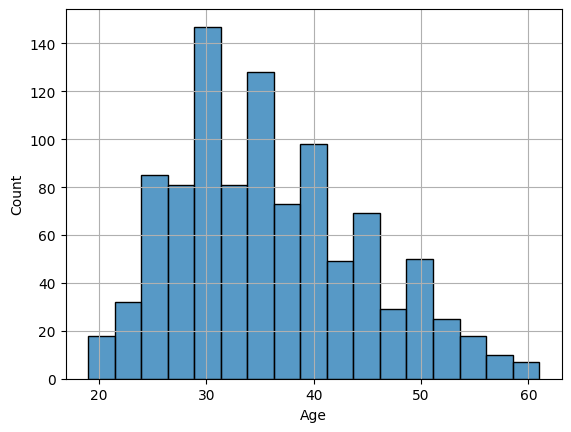

In [16]:
sns.histplot(df['Age'])
plt.grid()
plt.show()

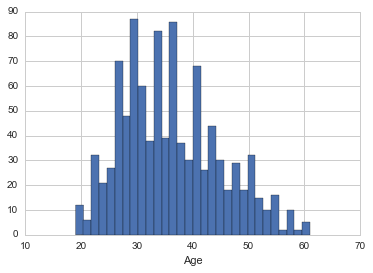

**Create a jointplot showing Area Income versus Age.**

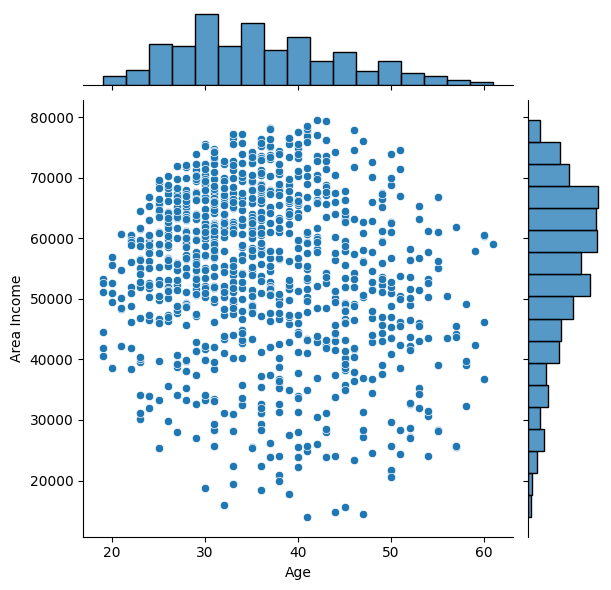

In [20]:
sns.jointplot(df, x='Age',y='Area Income')

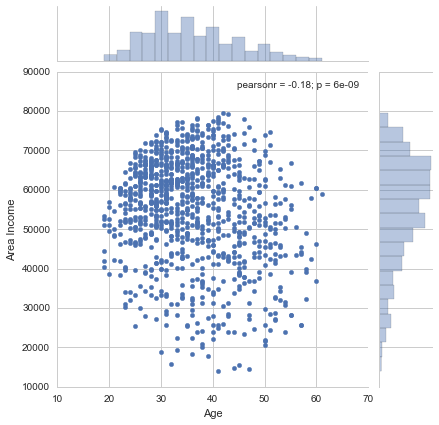

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

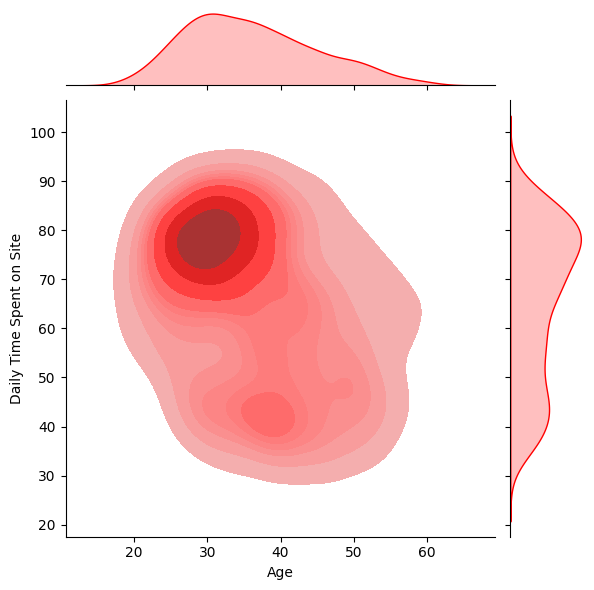

In [25]:
sns.jointplot(
    data=df,
    x='Age',
    y='Daily Time Spent on Site',
    color='red',
    kind='kde',
    fill=True
)
plt.show()

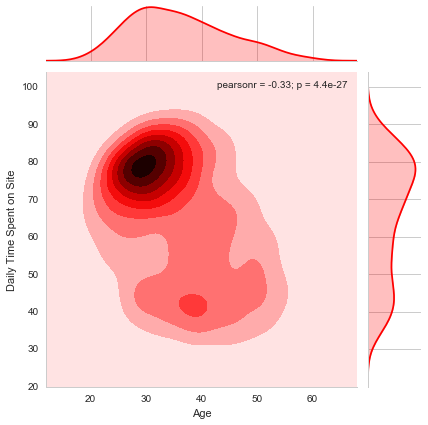

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

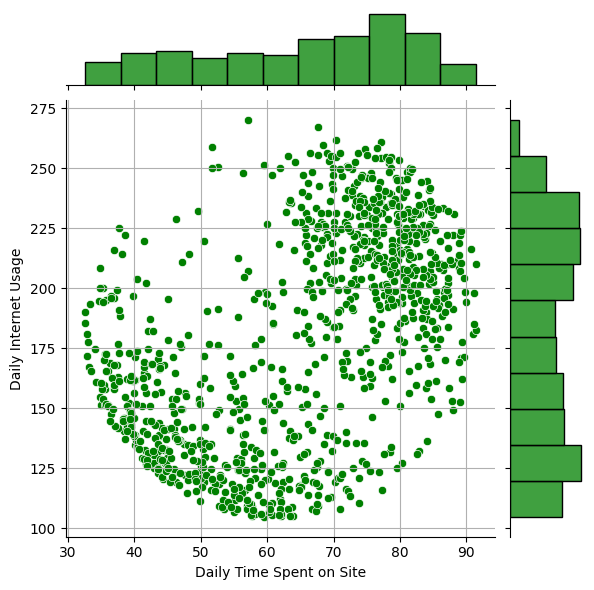

In [27]:
sns.jointplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage', color='green')
plt.grid()
plt.show()

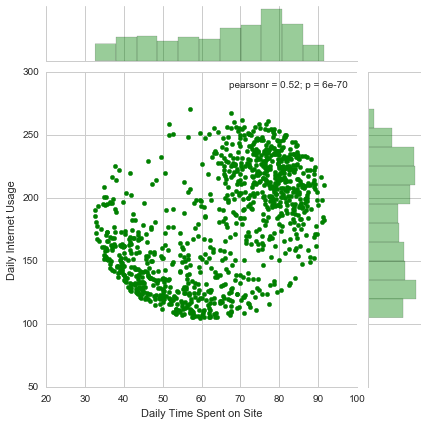

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

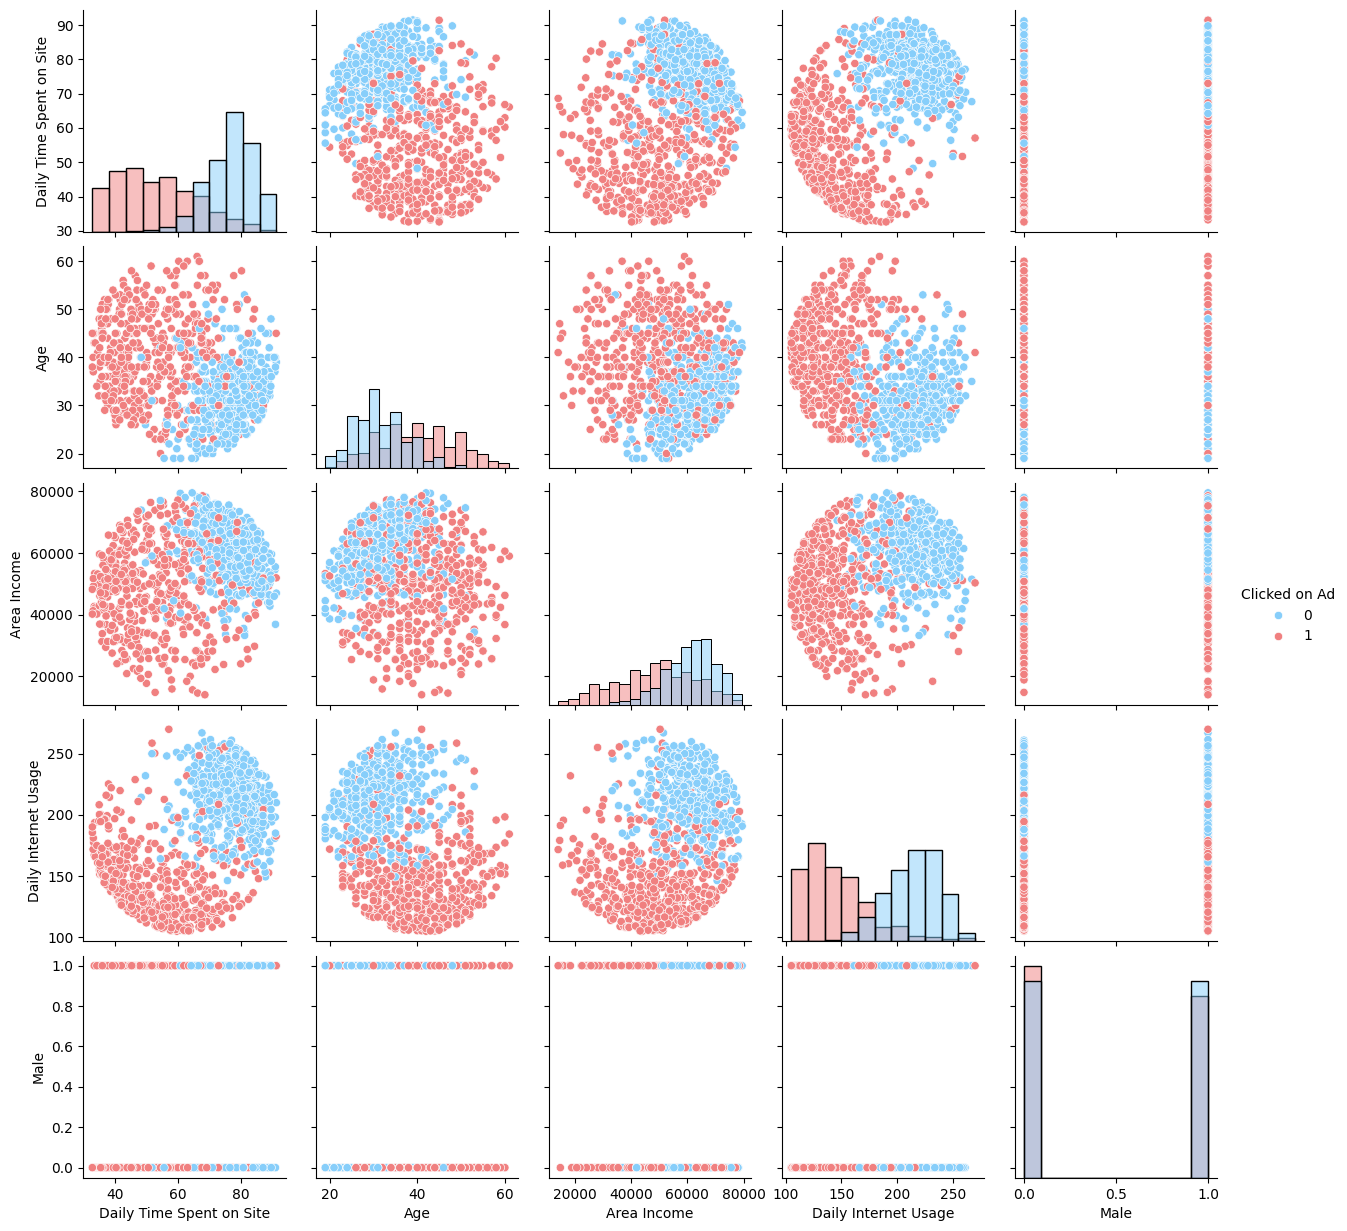

In [34]:
sns.pairplot(df, hue='Clicked on Ad', diag_kind='hist', palette={1:'lightcoral',0:'lightskyblue'})

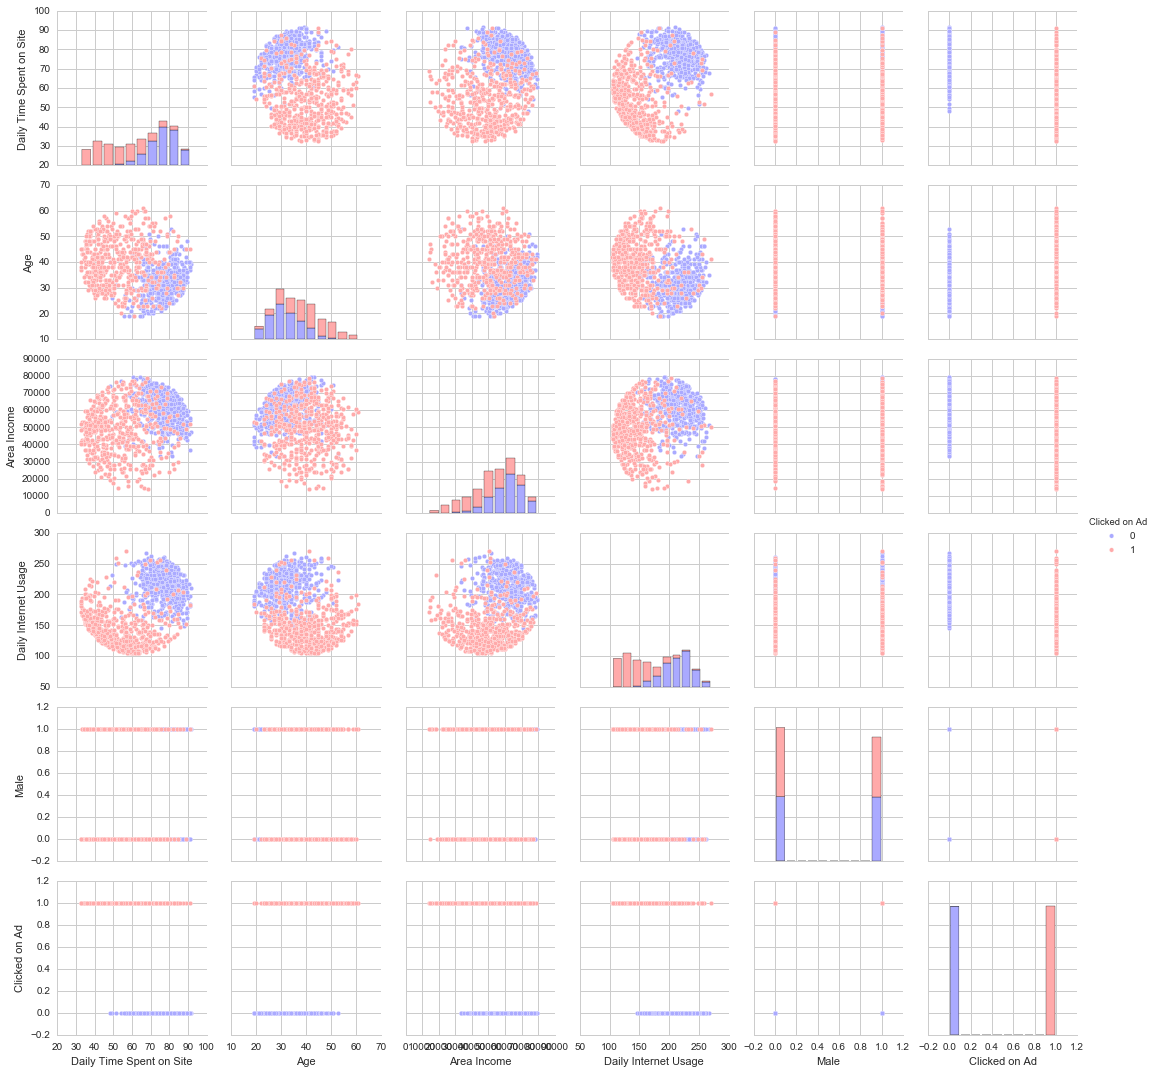

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [86]:
print(df['Ad Topic Line'].nunique())
print(df['City'].nunique())
print(df['Timestamp'].nunique())
# since most of the values in the columns above is unique we will drop it from the data

x = df.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Timestamp'], axis=1)
y = df['Clicked on Ad']

1000
969
1000


In [87]:
le = LabelEncoder()
x['Country'] = le.fit_transform(x['Country'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x,y)
print(X_train.columns)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Country'],
      dtype='object')


feature scaling

In [89]:
sc = StandardScaler()
x = sc.fit_transform(x)

** Train and fit a logistic regression model on the training set.**

In [90]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\MANAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [101]:
lr1 = LogisticRegression(
    solver='newton-cholesky', 
    multi_class='ovr')

lr2 = LogisticRegression(
    solver='newton-cg',
    penalty='l2', 
    C=0.001,
    max_iter=1000)

In [103]:
clf_compare = pd.DataFrame(columns=[])
models=[lr,lr1,lr2]
row_index = 0

for model in models:
    predicted = model.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = model.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(model.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(model.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by=['Test Accuracy'],ascending=False,inplace=True)    
clf_compare

C:\Users\MANAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\MANAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


,Train Accuracy,Test Accuracy,Precission,Recall,AUC
2,0.97600,0.960,0.99145,0.928,0.960
0,0.97867,0.952,0.97479,0.928,0.952
1,0.97867,0.952,0.97479,0.928,0.952


## Predictions and Evaluations
** Now predict values for the testing data.**

In [105]:
y_pred = lr2.predict(X_test)

** Create a Confusion Matrix for the model.**

<Axes: >

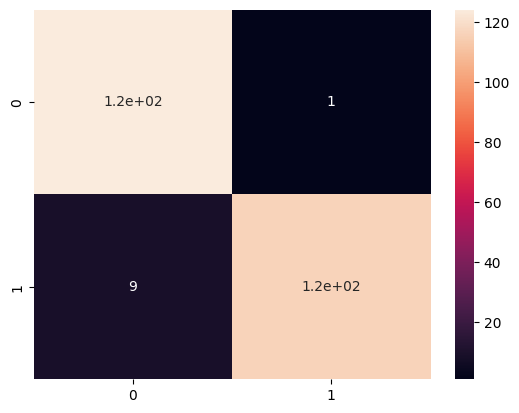

In [110]:
sns.matrix.heatmap(confusion_matrix(y_test,y_pred), annot=True)

## k-Nearest Neighbors

In [138]:
knn = KNeighborsClassifier()

In [139]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [140]:
y_pred = knn.predict(X_test)

In [141]:
knn_df = pd.DataFrame(columns=[])

In [142]:
fp, tp, th = roc_curve(y_test, y_pred)
knn_df.loc[row_index, 'Train Accuracy'] = round(model.score(X_train, y_train), 5)
knn_df.loc[row_index, 'Test Accuracy'] = round(model.score(X_test, y_test), 5)
knn_df.loc[row_index, 'Precission'] = round(precision_score(y_test, y_pred),5)
knn_df.loc[row_index, 'Recall'] = round(recall_score(y_test, y_pred),5)
knn_df.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

In [143]:
knn_df

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,0.976,0.96,0.73684,0.672,0.716


<Axes: >

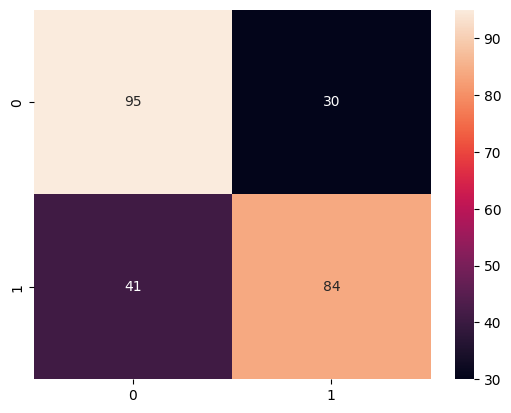

In [144]:
sns.matrix.heatmap(confusion_matrix(y_test,y_pred), annot=True)

##random forest classifier

In [145]:
rfc = RandomForestClassifier()

In [147]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_pred = rfc.predict(X_test)

In [149]:
rfc_df = pd.DataFrame(columns=[])

In [150]:
fp, tp, th = roc_curve(y_test, y_pred)
rfc_df.loc[row_index, 'Train Accuracy'] = round(model.score(X_train, y_train), 5)
rfc_df.loc[row_index, 'Test Accuracy'] = round(model.score(X_test, y_test), 5)
rfc_df.loc[row_index, 'Precission'] = round(precision_score(y_test, y_pred),5)
rfc_df.loc[row_index, 'Recall'] = round(recall_score(y_test, y_pred),5)
rfc_df.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

In [151]:
rfc_df

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,0.976,0.96,0.96639,0.92,0.944


<Axes: >

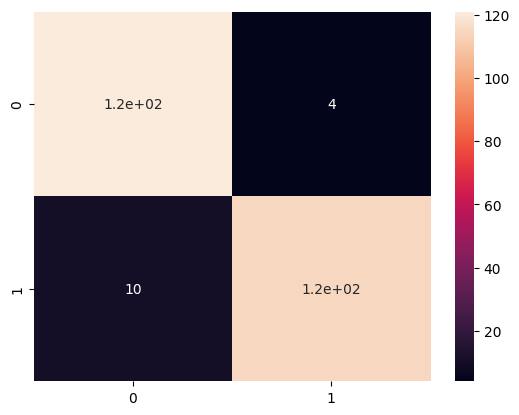

In [152]:
sns.matrix.heatmap(confusion_matrix(y_test,y_pred), annot=True)

## Great Job!